                **Study of roman road and how they influenced modern roads infrastructure**


---







First you have to import the data. Create a folder name data and upload all shape files and romanRoad.csv from the data floder included in the git project.

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving antiquity_line.dbf to antiquity_line.dbf
Saving antiquity_line.prj to antiquity_line.prj
Saving antiquity_line.shp to antiquity_line.shp
Saving antiquity_line.shx to antiquity_line.shx
Saving primary_road.dbf to primary_road.dbf
Saving primary_road.prj to primary_road.prj
Saving primary_road.shp to primary_road.shp
Saving primary_road.shx to primary_road.shx
Saving railway_line.dbf to railway_line.dbf
Saving railway_line.prj to railway_line.prj
Saving railway_line.shp to railway_line.shp
Saving railway_line.shx to railway_line.shx
Saving railway_point.dbf to railway_point.dbf
Saving railway_point.prj to railway_point.prj
Saving railway_point.shp to railway_point.shp
Saving railway_point.shx to railway_point.shx
Saving RomanRoad.csv to RomanRoad.csv




Next create a dataframe using pandas library from Python. This dataframe contains all known roads build by romans. The last row contain a roough approximation of the toal numbers of miles build by romans.

In [ ]:
import pandas as pd 

#
df_roman_roads = pd.read_csv('data/RomanRoad.csv')

print (df_roman_roads.columns)

print(df_roman_roads.head())

Index(['Roman road', 'Distance_miles', 'Route', 'Via',
       'Counterpart modern roads'],
      dtype='object')
          Roman road  ...                        Counterpart modern roads
0       Ackling Dyke  ...                               A354 at Woodyates
1  Akeman Street (1)  ...                      A41 from Bicester to Tring
2  Akeman Street (2)  ...  A603 from Wimpole to Cambridge then A10 to Ely
3        Batham Gate  ...                      B6049 Bradwell, Derbyshire
4        Cade's Road  ...                          A1034/1079 Brough-York

[5 rows x 5 columns]


There is another way to find the total number of miles form the dataframe.
First I noticed that there are couple of NaN values in the 'Distance_miles' column, so in order to apply sum on the column I will have to fill thouse with 
value 0.0. Then I will apply sum on the column 'Distance_mile' to find the total length of roads build by the romans.

In [ ]:
# fill NaN values in colimn 'Distance_miles' with value 0

df_roman_roads[['Distance_miles']].fillna(0.0)

sum = df_roman_roads['Distance_miles'][:30].sum()


print("Total number of miles is :" + str(sum))


Total number of miles is :2128.0


Let's install library necesary for geo panda

In [ ]:

%%time 


# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

!pip instal shapely

#Fiona package for reading and writing geospatial data files
#https://fiona.readthedocs.io/en/latest/manual.html
!pip install fiona

!pip install pprint





Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-j884m9o0
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-j884m9o

Now see if we can use geopanda. I read a shape file with geopanda.
Plotting shp file of roman roads.




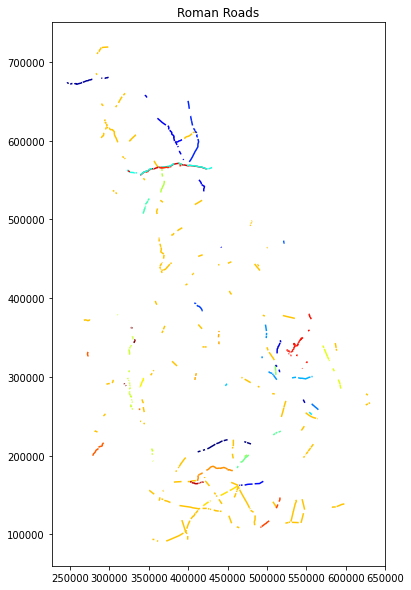

Index(['CODE', 'LEGEND', 'AMENDED', 'NAME', 'geometry'], dtype='object')

<Figure size 432x288 with 0 Axes>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# importing and plotting antiquity_line.shp shape file

roman_roads = gpd.read_file("data/antiquity_line.shp")

roman_roads.plot( cmap='jet', column = "NAME", figsize = (10,10))
plt.title("Roman Roads")
plt.show()
plt.savefig("england.png")
# See what colums are in roman_roads shape file
roman_roads.columns


In the next bit of code I will try to superimpose roman roads on top of modern roads. I choosed primary roads , but also I would like to test with railway.

     CODE  ...                                           geometry
122  5810  ...  LINESTRING (447240.000 288720.000, 447360.000 ...

[1 rows x 5 columns]


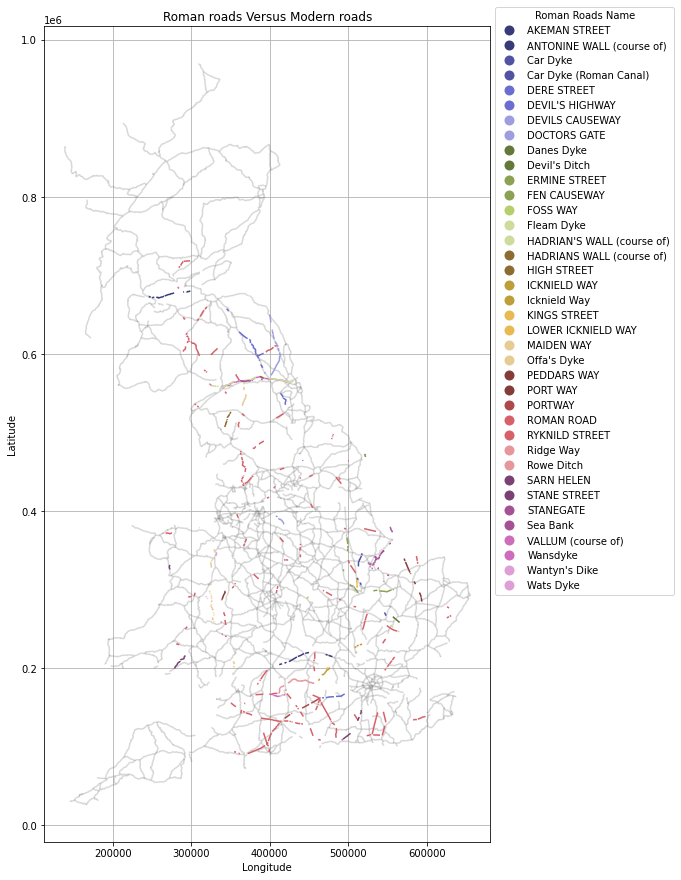

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

antiquity_roads = gpd.read_file("data/antiquity_line.shp")
primary_roads = gpd.read_file("data/primary_road.shp")

names = antiquity_roads[ antiquity_roads['NAME'] == 'FOSS WAY']

print(names )

#create a legend
lgnd_kwds = {'title': 'Roman Roads Name',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# display both shape files together
fig, ax = plt.subplots(1, figsize = (15,15))
plt.title("Roman roads Versus Modern roads")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
# parameter alpha control the level of transparency
primary_roads.plot(ax=ax, color='grey', alpha = 0.3)
antiquity_roads.plot(ax=ax, column='NAME',cmap = 'tab20b', legend=True, legend_kwds = lgnd_kwds)

#plt.savefig("roman_versus_modern_england_roads.png")


236116.9397693366


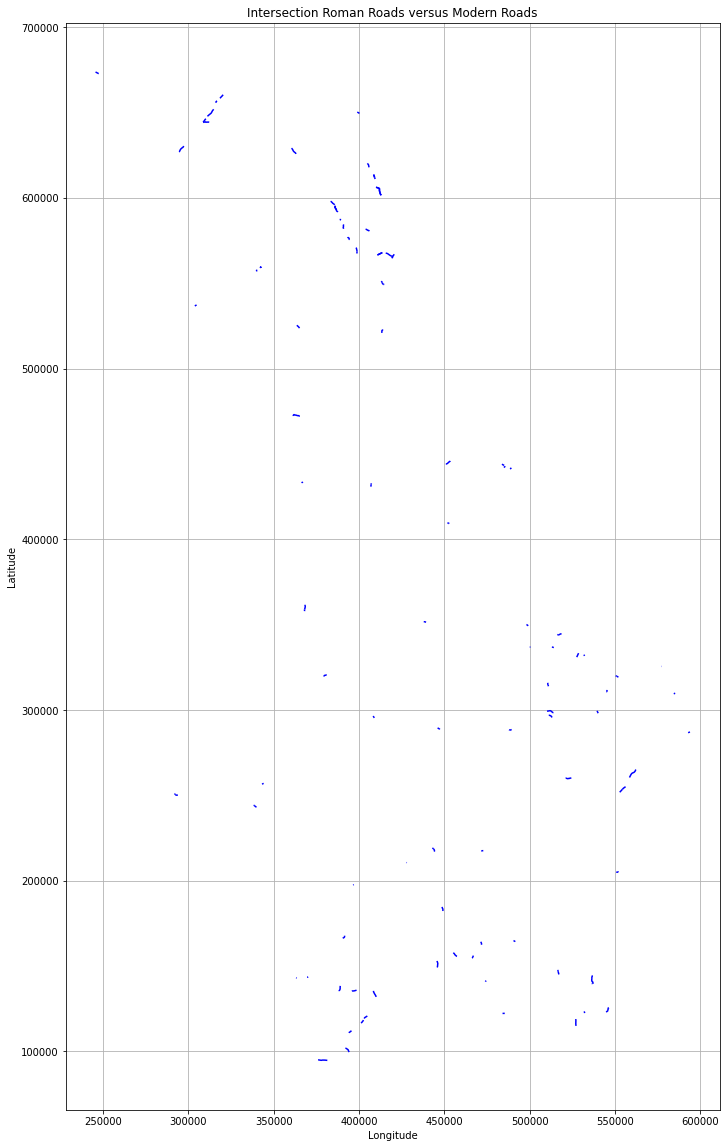

In [61]:

import matplotlib.pyplot as plt

#Intersecting 
intersections= gpd.sjoin(primary_roads, antiquity_roads, how="inner", op='intersects')
intersections.head()
intersections.shape
intersections.plot(color ="blue", figsize = (20,20))

#Calcultate the distances of all roads interesction
distances = intersections.geometry.length


print(distances.sum())

plt.title("Intersection Roman Roads versus Modern Roads")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

#plt.savefig("intersection_roman_versus_modern_england_roads.png")
#roads_interesect = gpd.overlay(roman_roads, modern_roads, how = 'intersection')
#


Next I want to see how roman roads influenced the railways

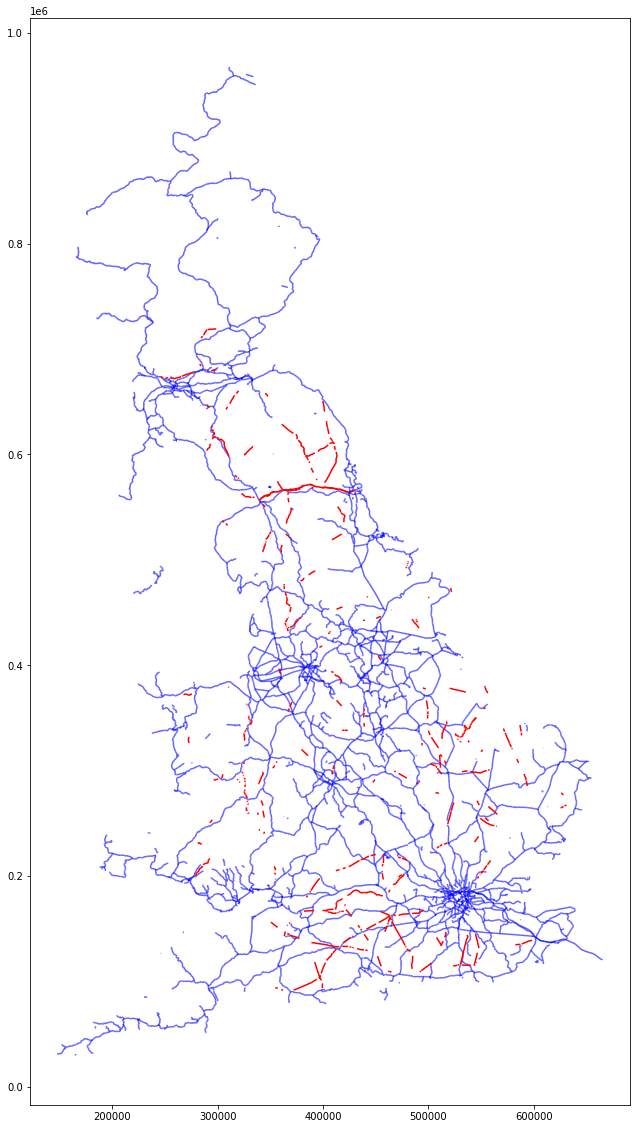

In [63]:

railway = gpd.read_file("data/railway_line.shp")

# display both shape files together
fig, ax = plt.subplots(1, figsize = (20,20))
# parameter alpha control the level of transparency
railway.plot(ax=ax, color = 'blue', alpha = 0.6)
antiquity_roads.plot(ax=ax, color = 'red')

plt.savefig("roman_versus_railway.png")



In the next block of code I'm trying to find out how many km of roman roads are still in use today.

    CODE_left LEGEND_left AMENDED_left  ... AMENDED_right NAME_right  ROAD_NO
3        5810  Roman Road   1993-01-01  ...    1999-01-29       None   A35(T)
3        5810  Roman Road   1993-01-01  ...    1993-06-28       None     A350
7        5810  Roman Road   2005-10-06  ...    2009-03-04       None     A361
10       5810  Roman Road   1993-01-01  ...    2009-03-04       None     A361
12       5810  Roman Road   1993-01-01  ...    1993-01-01       None     A350

[5 rows x 11 columns]
Index(['CODE_left', 'LEGEND_left', 'AMENDED_left', 'NAME_left', 'geometry',
       'index_right', 'CODE_right', 'LEGEND_right', 'AMENDED_right',
       'NAME_right', 'ROAD_NO'],
      dtype='object')
     CODE_left                              LEGEND_left  ... NAME_right ROAD_NO
337       5810                               Roman Road  ...       None     A68
337       5810                               Roman Road  ...       None     A68
338       5810                               Roman Road  ...       No

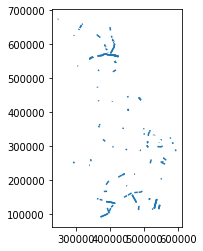

In [ ]:
#antiquity_roads = gpd.read_file("antiquity_line.shp")
#primary_roads = gpd.read_file("primary_road.shp")

#create a legend
lgnd_kwds = {'title': 'Roads',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

#Intersecting 
#intersections= gpd.sjoin(primary_roads, antiquity_roads, how="inner", op='intersects')
#intersections.head()
#intersections.shape
#intersections.plot(color ="blue", figsize = (20,20))

#plt.title("Intersection Roman Roads versus Modern Roads")
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")
#plt.grid()

#plt.savefig("intersection_roman_versus_modern_england_roads.png")
#roads_interesect = 
# parameter alpha control the level of transparency
#primary_roads.plot(ax=ax, color='grey', alpha = 0.5)
#antiquity_roads.plot(ax=ax, cmap = 'tab20', legend=True, legend_kwds = lgnd_kwds)

# Joining the two roads
#road_still_in_use = gpd.overlay(antiquity_roads, primary_roads, how ='intersection')
#print(road_still_in_use.head())

#Calculates the intersection between roman roads and modern roads
roads_joined = gpd.sjoin (antiquity_roads, primary_roads, op = "intersects")
print(roads_joined.head())

print(roads_joined.columns)

# Perform an aggregation to see how many old roman roads are contained within the modern roads
roads_joined_grouped = roads_joined[['NAME_left', 'ROAD_NO']].groupby('ROAD_NO')
print(roads_joined.loc[roads_joined.ROAD_NO == 'A68'])

print(roads_joined_grouped.agg('count').sort_values(by='NAME_left', ascending = False))

roads_joined.plot()



Now we see that A68 roads contains the most roman roads. We will plot a subset containing only A68

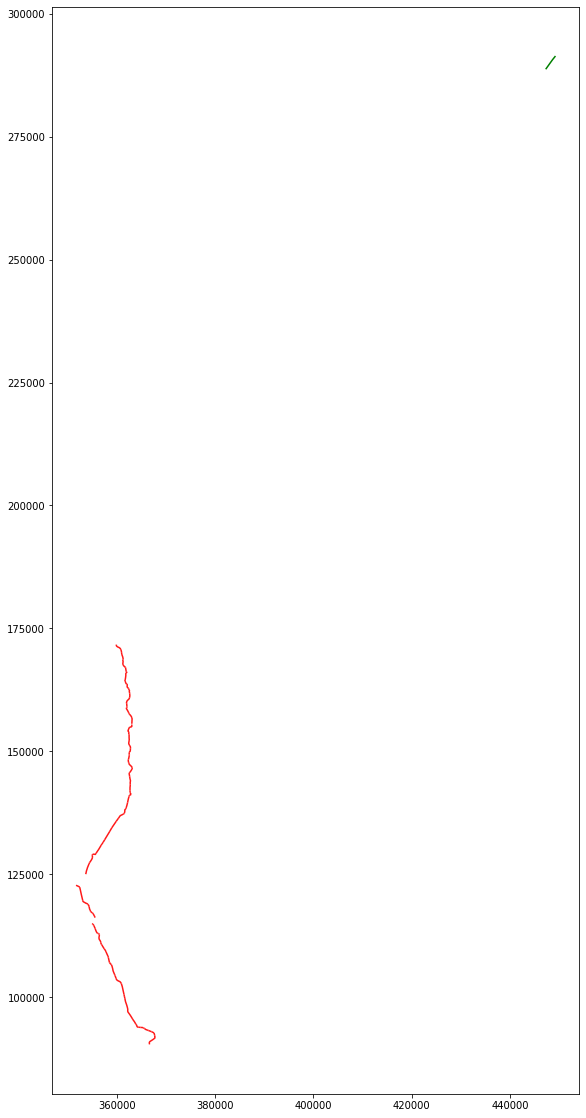

In [64]:
# create a subset containing only A68 road

a68_road =  primary_roads.loc[primary_roads.ROAD_NO == 'A37']
roman_road = antiquity_roads.loc[antiquity_roads.NAME == 'FOSS WAY']


# display both shape files together
fig, ax = plt.subplots(1, figsize = (20,20))
a68_road.plot(ax=ax, color = 'red', alpha = 0.9)
roman_road.plot(ax=ax, color = 'green')



Next I am calculating the number of kilometers shared by the to type of roads.

Working with Folium

In [65]:
from shapely.geometry import Point
import folium
import pandas as pd


antiquity_roads.geometry = antiquity_roads.geometry.to_crs(epsg = 4326)
primary_roads.geometry = primary_roads.geometry.to_crs(epsg= 4326)
foss_way =  antiquity_roads[ antiquity_roads['NAME'] == 'FOSS WAY']

#print (foss_way.head())

map_center = antiquity_roads.centroid[0]

print(map_center)

# Create an array for folium called center_location
center_location = [map_center.y, map_center.x]

#print(center_location)

road_map = folium.Map (location = center_location, zoom_start=6)
folium.GeoJson(foss_way.geometry).add_to(road_map)
#for row in foss_way.iterrows():
  
# add a pop with additional information
#add a marker to the map

#folium.GeoJson(primary_roads.geometry).add_to(road_map)

# Display the map
display(road_map)



POINT (-2.553090204949742 50.72351842309321)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if sys.path[0] == '':
